=== Đang chạy model: MiniLM ===
=== Đang chạy model: BGE ===
=== Đang chạy model: E5-Large ===

=== KẾT QUẢ BENCHMARK ===
      Model  Time (ms)  Cosine Mean  Euclidean Mean  Dot Mean
0    MiniLM      40.37        0.482           0.938     0.482
1       BGE     430.23        0.725           0.684     0.725
2  E5-Large     537.16        0.853           0.501     0.853


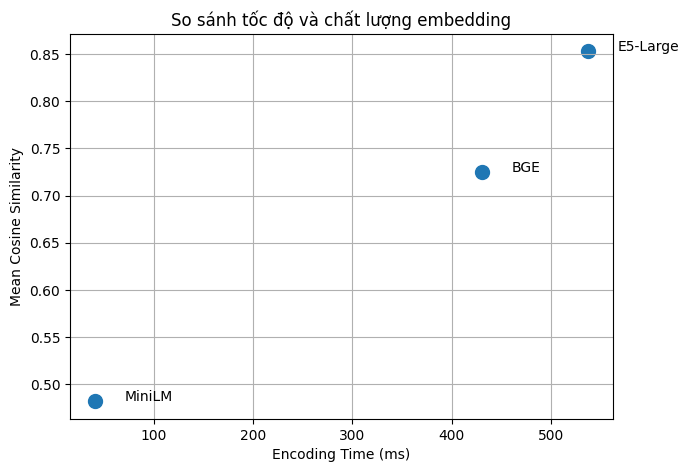


=== KẾT QUẢ SEARCH MẪU ===

Model: MiniLM
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.904)
  2. Cấu trúc dữ liệu và giải thuật nâng cao (score=0.614)
  3. Giới thiệu lập trình hướng đối tượng trong C# (score=0.453)

Model: BGE
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.922)
  2. Lập trình Java cho người mới bắt đầu (score=0.749)
  3. Giới thiệu lập trình hướng đối tượng trong C# (score=0.741)

Model: E5-Large
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.929)
  2. Cấu trúc dữ liệu và giải thuật nâng cao (score=0.846)
  3. Lập trình Java cho người mới bắt đầu (score=0.835)


In [2]:
# ==========================================
# 01_embedding_benchmark_extended.ipynb
# ==========================================
import time
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# === 1. Chuẩn bị dữ liệu mẫu ===
texts = [
    "Sách học lập trình Python cơ bản",
    "Lập trình Java cho người mới bắt đầu",
    "Khóa học Machine Learning nâng cao",
    "Sách hướng dẫn làm web với Django",
    "Tài liệu về học sâu và trí tuệ nhân tạo",
    "Giới thiệu lập trình hướng đối tượng trong C#",
    "Cấu trúc dữ liệu và giải thuật nâng cao"
]

query = "Tôi muốn tìm tài liệu về học máy và trí tuệ nhân tạo"

models = {
    "MiniLM": "all-MiniLM-L6-v2",
    "BGE": "BAAI/bge-base-en-v1.5",
    "E5-Large": "intfloat/e5-large-v2"
}

results = []
search_results = []

# === 2. Thực nghiệm từng model ===
for name, model_name in models.items():
    print(f"=== Đang chạy model: {name} ===")
    model = SentenceTransformer(model_name)

    # Đo thời gian encode
    start = time.time()
    emb = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)
    duration = (time.time() - start) * 1000  # ms

    # === Tính các độ đo tương đồng ===
    cosine_mean = np.mean(cosine_similarity(emb))
    euclid_mean = np.mean(euclidean_distances(emb))
    dot_mean = np.mean(np.dot(emb, emb.T))

    results.append({
        "Model": name,
        "Time (ms)": round(duration, 2),
        "Cosine Mean": round(cosine_mean, 3),
        "Euclidean Mean": round(euclid_mean, 3),
        "Dot Mean": round(dot_mean, 3)
    })

    # === Search thực tế ===
    query_emb = model.encode([query], convert_to_numpy=True, normalize_embeddings=True)
    scores = util.cos_sim(query_emb, emb)[0]  # cosine similarity cho từng văn bản
    top_idx = np.argsort(-scores)[:3]  # lấy top-3 kết quả

    search_results.append({
        "Model": name,
        "Query": query,
        "Top-3 Results": [texts[i] for i in top_idx],
        "Scores": [float(scores[i]) for i in top_idx]
    })

# === 3. Tổng hợp kết quả ===
df = pd.DataFrame(results)
print("\n=== KẾT QUẢ BENCHMARK ===")
print(df)

# === 4. Biểu đồ trực quan ===
plt.figure(figsize=(7, 5))
plt.scatter(df["Time (ms)"], df["Cosine Mean"], s=100)
for i, row in df.iterrows():
    plt.text(row["Time (ms)"] + 30, row["Cosine Mean"], row["Model"])
plt.xlabel("Encoding Time (ms)")
plt.ylabel("Mean Cosine Similarity")
plt.title("So sánh tốc độ và chất lượng embedding")
plt.grid(True)
plt.show()

# === 5. In kết quả tìm kiếm thực tế ===
print("\n=== KẾT QUẢ SEARCH MẪU ===")
for res in search_results:
    print(f"\nModel: {res['Model']}")
    for i, (text, score) in enumerate(zip(res["Top-3 Results"], res["Scores"])):
        print(f"  {i + 1}. {text} (score={score:.3f})")



=== 🔹 Benchmark model: MiniLM ===

=== 🔹 Benchmark model: BGE ===

=== 🔹 Benchmark model: E5-Large ===

=== KẾT QUẢ BENCHMARK TỔNG HỢP ===
      Model  Embedding Dim  Encode Time (ms)  Search Time (ms)  Mean Cosine
0    MiniLM            384             33.89              9.63        0.454
1       BGE            768            180.26              0.00        0.693
2  E5-Large           1024            639.81              0.00        0.844


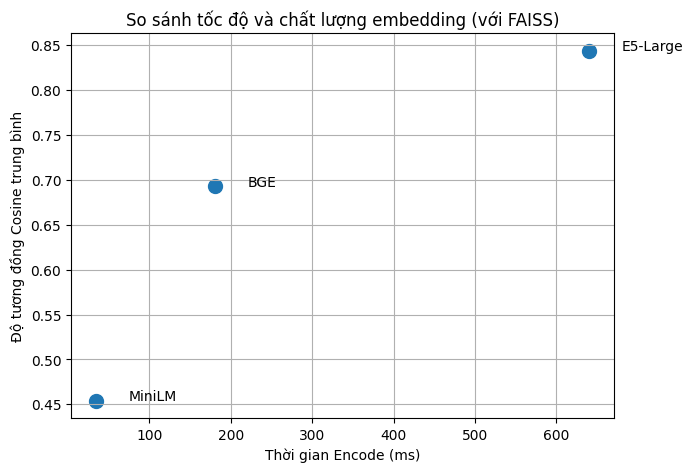

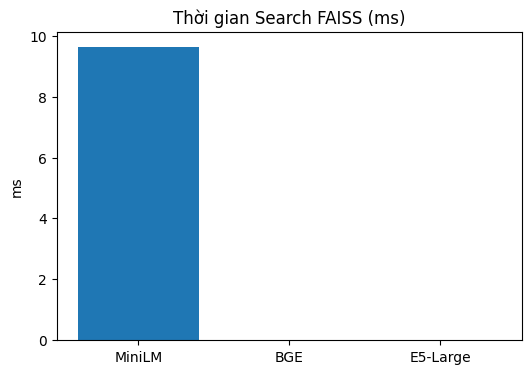


=== KẾT QUẢ SEARCH MẪU ===

Model: MiniLM
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.904)
  2. Cấu trúc dữ liệu và giải thuật nâng cao (score=0.614)
  3. Phân tích dữ liệu với Pandas và NumPy (score=0.554)

Model: BGE
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.922)
  2. Lập trình Java cho người mới bắt đầu (score=0.749)
  3. Giới thiệu lập trình hướng đối tượng trong C# (score=0.741)

Model: E5-Large
  1. Tài liệu về học sâu và trí tuệ nhân tạo (score=0.929)
  2. Cấu trúc dữ liệu và giải thuật nâng cao (score=0.846)
  3. Lập trình Java cho người mới bắt đầu (score=0.835)


In [3]:
# ==========================================
# 02_embedding_faiss_benchmark.ipynb
# ==========================================
import time
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import faiss
from sentence_transformers import util
import matplotlib.pyplot as plt

# === 1. Chuẩn bị dữ liệu ===
texts = [
    "Sách học lập trình Python cơ bản",
    "Lập trình Java cho người mới bắt đầu",
    "Khóa học Machine Learning nâng cao",
    "Sách hướng dẫn làm web với Django",
    "Tài liệu về học sâu và trí tuệ nhân tạo",
    "Giới thiệu lập trình hướng đối tượng trong C#",
    "Cấu trúc dữ liệu và giải thuật nâng cao",
    "Phân tích dữ liệu với Pandas và NumPy",
    "Xây dựng ứng dụng web với React và Node.js",
    "Xử lý ngôn ngữ tự nhiên bằng mô hình BERT"
]

query = "Tôi muốn tìm tài liệu về học máy và trí tuệ nhân tạo"

models = {
    "MiniLM": "all-MiniLM-L6-v2",
    "BGE": "BAAI/bge-base-en-v1.5",
    "E5-Large": "intfloat/e5-large-v2"
}

results = []
search_results = []

# === 2. Thực nghiệm từng model ===
for name, model_name in models.items():
    print(f"\n=== 🔹 Benchmark model: {name} ===")
    model = SentenceTransformer(model_name)

    # ---- 2.1 Encode dữ liệu ----
    start = time.time()
    emb = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)
    encode_time = (time.time() - start) * 1000

    dim = emb.shape[1]
    cosine_mean = np.mean(cosine_similarity(emb))

    # ---- 2.2 FAISS Index (cosine) ----
    # Vì FAISS chỉ hỗ trợ dot-product hoặc L2, ta dùng dot + normalize
    index = faiss.IndexFlatIP(dim)
    index.add(emb)

    # ---- 2.3 Encode query & search ----
    query_emb = model.encode([query], convert_to_numpy=True, normalize_embeddings=True)
    start_search = time.time()
    D, I = index.search(query_emb, k=3)
    search_time = (time.time() - start_search) * 1000

    results.append({
        "Model": name,
        "Embedding Dim": dim,
        "Encode Time (ms)": round(encode_time, 2),
        "Search Time (ms)": round(search_time, 2),
        "Mean Cosine": round(cosine_mean, 3)
    })

    # ---- 2.4 Lưu top-3 kết quả ----
    search_results.append({
        "Model": name,
        "Query": query,
        "Top-3 Results": [texts[i] for i in I[0]],
        "Scores": [float(D[0][j]) for j in range(3)]
    })

# === 3. Kết quả tổng hợp ===
df = pd.DataFrame(results)
print("\n=== KẾT QUẢ BENCHMARK TỔNG HỢP ===")
print(df)

# === 4. Biểu đồ trực quan ===
plt.figure(figsize=(7, 5))
plt.scatter(df["Encode Time (ms)"], df["Mean Cosine"], s=100)
for i, row in df.iterrows():
    plt.text(row["Encode Time (ms)"] + 40, row["Mean Cosine"], row["Model"])
plt.xlabel("Thời gian Encode (ms)")
plt.ylabel("Độ tương đồng Cosine trung bình")
plt.title("So sánh tốc độ và chất lượng embedding (với FAISS)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Search Time (ms)"])
plt.title("Thời gian Search FAISS (ms)")
plt.ylabel("ms")
plt.show()

# === 5. In kết quả search thực tế ===
print("\n=== KẾT QUẢ SEARCH MẪU ===")
for res in search_results:
    print(f"\nModel: {res['Model']}")
    for i, (text, score) in enumerate(zip(res["Top-3 Results"], res["Scores"])):
        print(f"  {i + 1}. {text} (score={score:.3f})")


📘 Dataset gồm 1000 mô tả sách tiếng Việt


🔹 Đang benchmark model: MiniLM

🔹 Đang benchmark model: BGE

🔹 Đang benchmark model: E5-Large

🔹 Đang benchmark model: Vi-SBERT

🔹 Đang benchmark model: SimCSE-Phobert


No sentence-transformers model found with name VoVanPhuc/sup-SimCSE-VietNamese-phobert-base. Creating a new one with mean pooling.



🔹 Đang benchmark model: SimCSE-Roberta

=== 📊 KẾT QUẢ BENCHMARK ===
             Model FAISS Index   Dim  Encode (ms)  Train (ms)  Add (ms)  \
0           MiniLM      FlatIP   384      8918.28        0.00      1.00   
1           MiniLM      FlatL2   384      8918.28        0.00      0.00   
2           MiniLM     IVFFlat   384      8918.28        6.03      1.01   
3           MiniLM    HNSWFlat   384      8918.28        0.00     10.03   
4              BGE      FlatIP   768     53769.96        0.00      1.01   
5              BGE      FlatL2   768     53769.96        0.00      1.00   
6              BGE     IVFFlat   768     53769.96        9.03      1.00   
7              BGE    HNSWFlat   768     53769.96        0.00     27.08   
8         E5-Large      FlatIP  1024    176139.90        0.00      1.01   
9         E5-Large      FlatL2  1024    176139.90        0.00      1.00   
10        E5-Large     IVFFlat  1024    176139.90       11.53      2.01   
11        E5-Large    HNSWFlat 

C:\Users\Admin\PycharmProjects\LightRAG\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\PycharmProjects\LightRAG\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


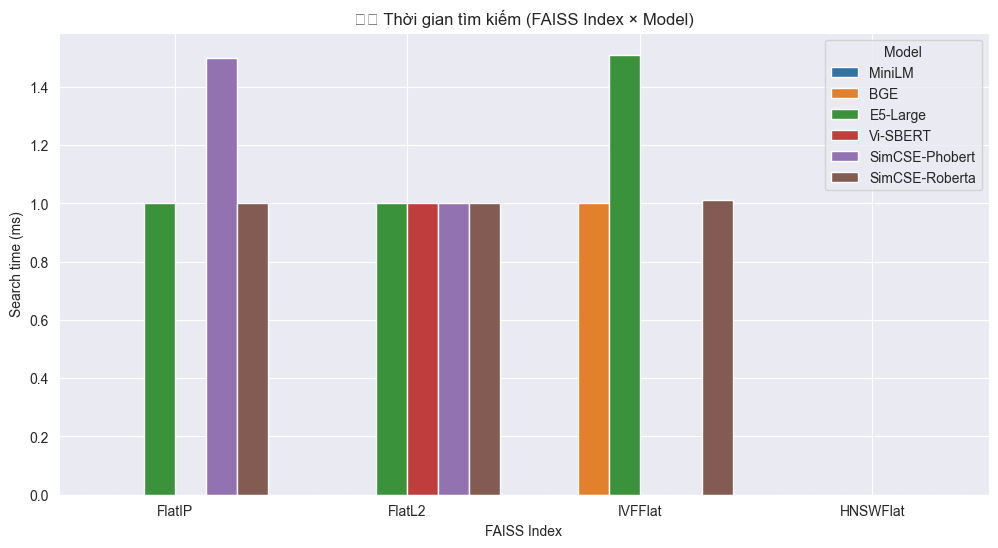

C:\Users\Admin\PycharmProjects\LightRAG\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\PycharmProjects\LightRAG\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


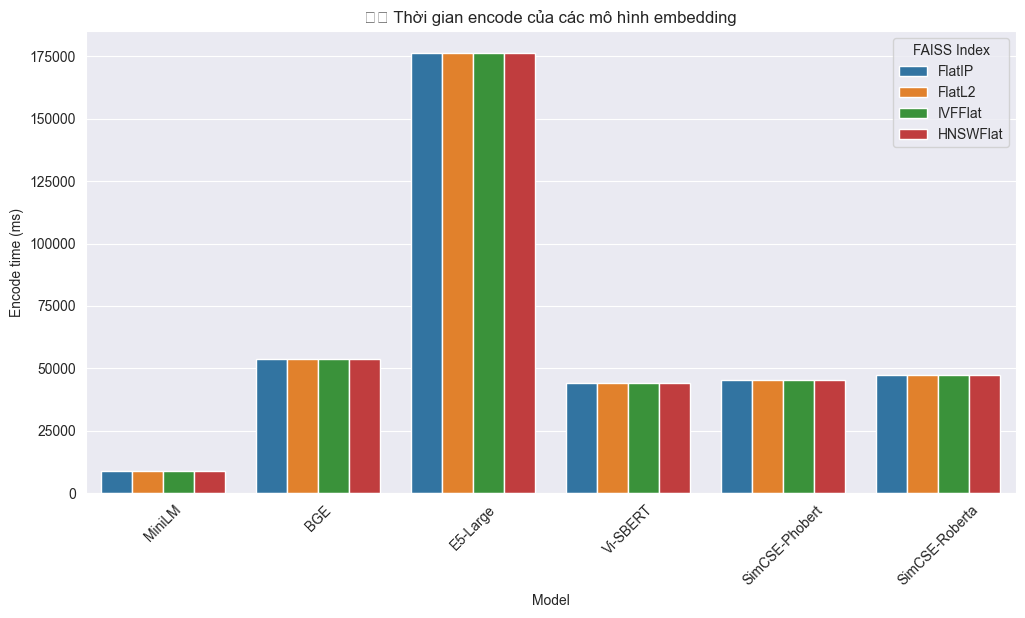

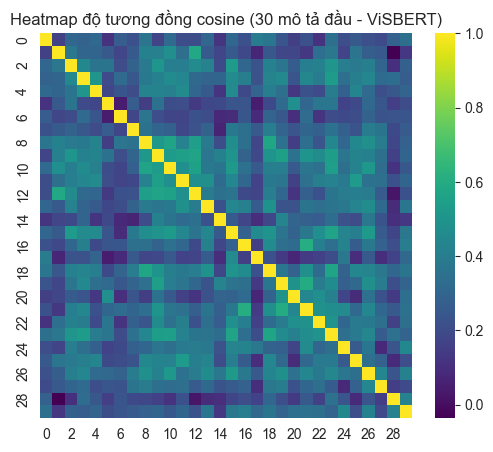


=== 🔍 KẾT QUẢ SEARCH MẪU ===

Model: MiniLM
  1. Nơi Ánh Sáng Không Bao Giờ Tắt (score=0.398)
  2. Lôi Thần Và Nhân Viên Văn Phòng (Tập 3) (score=0.448)
  3. Những Ngày Cuối Của Dòng Mekong Hùng Vĩ  (score=0.505)

Model: BGE
  1. Nơi Ánh Sáng Không Bao Giờ Tắt (score=0.318)
  2. Cho Tôi Xin Một Vé Đi Tuổi Thơ (Bìa Mềm) (Tái Bản) (score=0.323)
  3. Những bí ẩn trên thế giới chưa được giải đáp (Bìa cứng) - Tái bản (score=0.339)

Model: E5-Large
  1. Đi khi ta còn trẻ (score=0.223)
  2. Năm Điều Ước Của Ông Murray Mcbride (score=0.239)
  3. Nơi Ánh Sáng Không Bao Giờ Tắt (score=0.241)

Model: Vi-SBERT
  1. Toàn Chân Triết Luận (score=0.791)
  2. Nhập môn Lý thuyết Văn học (score=0.888)
  3. Thơ Hay Viết Cho Thiếu Nhi - Bầu Trời Trong Quả Trứng (Tái Bản) (score=0.902)

Model: SimCSE-Phobert
  1. Toàn Chân Triết Luận (score=0.584)
  2. Dẫn luận Thi pháp học văn học (score=0.653)
  3. Gia Huấn Ca Tường Chú (score=0.678)

Model: SimCSE-Roberta
  1. Toàn Chân Triết Luận (score=0.901)
  2. Để 

In [5]:
# ==========================================
# 03_embedding_faiss_full_benchmark_vietnamese.ipynb
# ==========================================
import time
import numpy as np
import pandas as pd
import faiss
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# === 1. Đọc dữ liệu thật ===
df_books = pd.read_csv("C:/Users/Admin/PycharmProjects/LightRAG/src/example/faiss/data/books_data.csv")
texts = df_books["short_description"].dropna().tolist()[:1000]  # Lấy 1000 mô tả đầu
query = "Tôi muốn tìm những cuốn sách về triết lý sống và con người trong tự nhiên"

print(f"📘 Dataset gồm {len(texts)} mô tả sách tiếng Việt\n")

# === 2. Danh sách model (gồm cả Việt hóa) ===
models = {
    "MiniLM": "all-MiniLM-L6-v2",
    "BGE": "BAAI/bge-base-en-v1.5",
    "E5-Large": "intfloat/e5-large-v2",
    "Vi-SBERT": "keepitreal/vietnamese-sbert",
    "SimCSE-Phobert": "VoVanPhuc/sup-SimCSE-VietNamese-phobert-base",
    "SimCSE-Roberta": "dangvantuan/vietnamese-embedding"
}

# === 3. Các loại FAISS index sẽ thử nghiệm ===
faiss_indexes = {
    "FlatIP": lambda d: faiss.IndexFlatIP(d),
    "FlatL2": lambda d: faiss.IndexFlatL2(d),
    "IVFFlat": lambda d: faiss.IndexIVFFlat(faiss.IndexFlatL2(d), d, 10),
    "HNSWFlat": lambda d: faiss.IndexHNSWFlat(d, 32)
}

# === 4. Chuẩn bị lưu kết quả ===
results = []
search_samples = []

# === 5. Thực nghiệm từng model ===
for model_name, model_path in models.items():
    print(f"\n==============================")
    print(f"🔹 Đang benchmark model: {model_name}")
    model = SentenceTransformer(model_path)

    # --- Encode dữ liệu ---
    start = time.time()
    emb = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)
    encode_time = (time.time() - start) * 1000
    dim = emb.shape[1]
    cosine_mean = np.mean(cosine_similarity(emb[:300]))  # lấy mẫu 300 để nhanh

    # --- Encode query ---
    query_emb = model.encode([query], convert_to_numpy=True, normalize_embeddings=True)

    # --- Benchmark từng loại FAISS ---
    for index_name, index_fn in faiss_indexes.items():
        index = index_fn(dim)
        train_time = 0

        # FAISS IVF cần train
        if index_name == "IVFFlat":
            start_train = time.time()
            index.train(emb)
            train_time = (time.time() - start_train) * 1000
            index.nprobe = 5

        start_add = time.time()
        index.add(emb)
        add_time = (time.time() - start_add) * 1000

        start_search = time.time()
        D, I = index.search(query_emb, k=3)
        search_time = (time.time() - start_search) * 1000

        results.append({
            "Model": model_name,
            "FAISS Index": index_name,
            "Dim": dim,
            "Encode (ms)": round(encode_time, 2),
            "Train (ms)": round(train_time, 2),
            "Add (ms)": round(add_time, 2),
            "Search (ms)": round(search_time, 2),
            "Mean Cosine": round(cosine_mean, 3)
        })

        top3 = [df_books.iloc[i]["name"] for i in I[0]]
        search_samples.append({
            "Model": model_name,
            "Index": index_name,
            "Top-3 Results": top3,
            "Scores": [float(D[0][j]) for j in range(3)]
        })

# === 6. Kết quả tổng hợp ===
df_res = pd.DataFrame(results)
print("\n=== 📊 KẾT QUẢ BENCHMARK ===")
print(df_res)

# === 7. Biểu đồ so sánh tốc độ tìm kiếm ===
plt.figure(figsize=(12, 6))
sns.barplot(data=df_res, x="FAISS Index", y="Search (ms)", hue="Model")
plt.title("⏱️ Thời gian tìm kiếm (FAISS Index × Model)")
plt.ylabel("Search time (ms)")
plt.grid(True)
plt.show()

# === 8. Biểu đồ Encode time ===
plt.figure(figsize=(12, 6))
sns.barplot(data=df_res, x="Model", y="Encode (ms)", hue="FAISS Index")
plt.title("⚙️ Thời gian encode của các mô hình embedding")
plt.ylabel("Encode time (ms)")
plt.xticks(rotation=45)
plt.show()

# === 9. Heatmap cosine (1 mô hình Việt hóa) ===
model_vn = SentenceTransformer("keepitreal/vietnamese-sbert")
sample_emb = model_vn.encode(texts[:30], convert_to_numpy=True, normalize_embeddings=True)
sim = cosine_similarity(sample_emb)
plt.figure(figsize=(6, 5))
sns.heatmap(sim, cmap="viridis")
plt.title("Heatmap độ tương đồng cosine (30 mô tả đầu - ViSBERT)")
plt.show()

# === 10. In kết quả search thực tế ===
print("\n=== 🔍 KẾT QUẢ SEARCH MẪU ===")
for res in search_samples:
    if res["Index"] == "HNSWFlat":  # chỉ in 1 loại để tránh trùng
        print(f"\nModel: {res['Model']}")
        for i, (title, score) in enumerate(zip(res["Top-3 Results"], res["Scores"])):
            print(f"  {i + 1}. {title} (score={score:.3f})")



In [1]:
# ============================================================
# 🔥 BENCHMARK FAISS vs LIGHTRAG — Vietnamese SBERT
# ============================================================

import time
import numpy as np
import faiss
import nest_asyncio

nest_asyncio.apply()

from sentence_transformers import SentenceTransformer
from lightrag import LightRAG
from lightrag.utils import EmbeddingFunc
from lightrag.llm.ollama import ollama_model_complete, ollama_embed

print("\n==============================")
print("🚀 Benchmark: FAISS vs LightRAG (Vietnamese SBERT)")

# ------------------------------------------------------------
# 1) Sample dữ liệu benchmark
# ------------------------------------------------------------
texts = [
    "Hà Nội là thủ đô của Việt Nam.",
    "TP.HCM là trung tâm kinh tế lớn nhất Việt Nam.",
    "Python là một ngôn ngữ lập trình phổ biến.",
    "FAISS là thư viện tìm kiếm vector của Facebook.",
    "LightRAG là thư viện RAG hiệu suất cao.",
    "Bóng đá là môn thể thao phổ biến ở Việt Nam.",
]
query = "thư viện tìm kiếm vector"

# ------------------------------------------------------------
# 2) SỬ DỤNG MODEL VIETNAMESE SBERT
# ------------------------------------------------------------
model_name = "keepitreal/vietnamese-sbert"
model = SentenceTransformer(model_name)

embedding_dim = model.get_sentence_embedding_dimension()


def encode_fn(texts):
    return model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)


# ------------------------------------------------------------
# 3) FAISS Benchmark
# ------------------------------------------------------------
start = time.time()
faiss_embeddings = encode_fn(texts)
faiss_encode_time = (time.time() - start) * 1000

index = faiss.IndexFlatIP(embedding_dim)

start = time.time()
index.add(faiss_embeddings)
faiss_add_time = (time.time() - start) * 1000

start = time.time()
q_emb = encode_fn([query])
scores, idx = index.search(q_emb, 3)
faiss_search_time = (time.time() - start) * 1000

print("\n=== 📘 Kết quả FAISS ===")
print(f"Encode embeddings: {faiss_encode_time:.2f} ms")
print(f"Add vectors:       {faiss_add_time:.2f} ms")
print(f"Search time:       {faiss_search_time:.2f} ms")
print("\nTop-3:")
for i in range(3):
    print(f"{i + 1}. {texts[idx[0][i]]} (score={scores[0][i]:.3f})")

# ------------------------------------------------------------
# 4) LightRAG Benchmark
# ------------------------------------------------------------

encoder = EmbeddingFunc(
    embedding_dim=768,
    max_token_size=8192,
    func=lambda texts: ollama_embed(
        texts, embed_model="nomic-embed-text", host="http://localhost:11434"
    ),
)

rag = LightRAG(
    working_dir="./lightrag_cache",
    embedding_func=encoder,
    llm_model_func=lambda **kw: None,  # tắt LLM
    llm_model_name="none"
)

# Insert docs — phải dùng async
start = time.time()
for doc in texts:
    await rag.ainsert(doc)
lightrag_insert = (time.time() - start) * 1000

# Encode query
start = time.time()
q_emb = encode_fn([query])[0]
lightrag_query_time = (time.time() - start) * 1000

# Vector Search
start = time.time()
scores, idx = rag.vector_search(q_emb, top_k=3)
lightrag_search_time = (time.time() - start) * 1000

print("\n=== 📘 Kết quả LightRAG ===")
print(f"Insert docs:       {lightrag_insert:.2f} ms")
print(f"Encode query:      {lightrag_query_time:.2f} ms")
print(f"Search time:       {lightrag_search_time:.2f} ms")
print("\nTop-3:")
for i, (id, sc) in enumerate(zip(idx, scores)):
    print(f"{i + 1}. {texts[id]} (score={sc:.3f})")

print("\n🎉 DONE — Benchmark Completed!")


C:\Users\Admin\PycharmProjects\LightRAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



🚀 Benchmark: FAISS vs LightRAG (Vietnamese SBERT)

=== 📘 Kết quả FAISS ===
Encode embeddings: 231.95 ms
Add vectors:       2.00 ms
Search time:       30.76 ms

Top-3:
1. FAISS là thư viện tìm kiếm vector của Facebook. (score=0.718)
2. LightRAG là thư viện RAG hiệu suất cao. (score=0.347)
3. TP.HCM là trung tâm kinh tế lớn nhất Việt Nam. (score=0.217)


INFO: Process 22440 Shared-Data created for Single Process
INFO:nano-vectordb:Init {'embedding_dim': 768, 'metric': 'cosine', 'storage_file': './lightrag_cache\\vdb_entities.json'} 0 data
INFO:nano-vectordb:Init {'embedding_dim': 768, 'metric': 'cosine', 'storage_file': './lightrag_cache\\vdb_relationships.json'} 0 data
INFO:nano-vectordb:Init {'embedding_dim': 768, 'metric': 'cosine', 'storage_file': './lightrag_cache\\vdb_chunks.json'} 0 data


AttributeError: 'NoneType' object has no attribute 'keys'

In [12]:
import inspect
from lightrag import LightRAG

print(inspect.signature(LightRAG.__init__))


(self, working_dir: 'str' = './lightrag_cache_2025-11-19-23:57:51', kv_storage: 'str' = 'JsonKVStorage', vector_storage: 'str' = 'NanoVectorDBStorage', graph_storage: 'str' = 'NetworkXStorage', doc_status_storage: 'str' = 'JsonDocStatusStorage', log_level: 'int | None' = None, log_file_path: 'str | None' = None, entity_extract_max_gleaning: 'int' = 1, entity_summary_to_max_tokens: 'int' = 500, chunk_token_size: 'int' = 1200, chunk_overlap_token_size: 'int' = 100, tiktoken_model_name: 'str' = 'gpt-4o-mini', chunking_func: 'Callable[[str, str | None, bool, int, int, str], list[dict[str, Any]]]' = <factory>, node_embedding_algorithm: 'str' = 'node2vec', node2vec_params: 'dict[str, int]' = <factory>, embedding_func: 'EmbeddingFunc | None' = None, embedding_batch_num: 'int' = 32, embedding_func_max_async: 'int' = 16, embedding_cache_config: 'dict[str, Any]' = <factory>, llm_model_func: 'Callable[..., object] | None' = None, llm_model_name: 'str' = 'gpt-4o-mini', llm_model_max_token_size: 'i

In [3]:
# ==========================================
# 03_embedding_faiss_full_benchmark_vietnamese.ipynb
# ==========================================
import time
import numpy as np
import pandas as pd
import faiss
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# === 1. Đọc dữ liệu thật ===
df_books = pd.read_csv("C:/Users/Admin/PycharmProjects/LightRAG/src/example/faiss/data/books_data.csv")
texts = df_books["short_description"].dropna().tolist()[:1000]  # Lấy 1000 mô tả đầu
query = "Tôi muốn tìm những cuốn sách về triết lý sống và con người trong tự nhiên"

print(f"📘 Dataset gồm {len(texts)} mô tả sách tiếng Việt\n")

# === 2. Danh sách model (thêm Nomic) ===
models = {
    "MiniLM": "all-MiniLM-L6-v2",
    "BGE": "BAAI/bge-base-en-v1.5",
    "E5-Large": "intfloat/e5-large-v2",
    "Vi-SBERT": "keepitreal/vietnamese-sbert",
    "SimCSE-Phobert": "VoVanPhuc/sup-SimCSE-VietNamese-phobert-base",
    "SimCSE-Roberta": "dangvantuan/vietnamese-embedding",
}

# === 3. Các loại FAISS index sẽ thử nghiệm ===
faiss_indexes = {
    "FlatIP": lambda d: faiss.IndexFlatIP(d),
    "FlatL2": lambda d: faiss.IndexFlatL2(d),
    "IVFFlat": lambda d: faiss.IndexIVFFlat(faiss.IndexFlatL2(d), d, 10),
    "HNSWFlat": lambda d: faiss.IndexHNSWFlat(d, 32)
}

# === 4. Chuẩn bị lưu kết quả ===
results = []
search_samples = []

# === 5. Thực nghiệm từng model ===
for model_name, model_path in models.items():
    print(f"\n==============================")
    print(f"🔹 Đang benchmark model: {model_name}")
    model = SentenceTransformer(model_path)

    # --- Encode dữ liệu ---
    start = time.time()
    emb = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True)
    encode_time = (time.time() - start) * 1000
    dim = emb.shape[1]
    cosine_mean = np.mean(cosine_similarity(emb[:300]))

    # --- Encode query ---
    query_emb = model.encode([query], convert_to_numpy=True, normalize_embeddings=True)

    # --- Benchmark từng FAISS ---
    for index_name, index_fn in faiss_indexes.items():
        index = index_fn(dim)
        train_time = 0

        if index_name == "IVFFlat":
            start_train = time.time()
            index.train(emb)
            train_time = (time.time() - start_train) * 1000
            index.nprobe = 5

        start_add = time.time()
        index.add(emb)
        add_time = (time.time() - start_add) * 1000

        start_search = time.time()
        D, I = index.search(query_emb, k=3)
        search_time = (time.time() - start_search) * 1000

        results.append({
            "Model": model_name,
            "FAISS Index": index_name,
            "Dim": dim,
            "Encode (ms)": round(encode_time, 2),
            "Train (ms)": round(train_time, 2),
            "Add (ms)": round(add_time, 2),
            "Search (ms)": round(search_time, 2),
            "Mean Cosine": round(cosine_mean, 3)
        })

        top3 = [df_books.iloc[i]["name"] for i in I[0]]
        search_samples.append({
            "Model": model_name,
            "Index": index_name,
            "Top-3 Results": top3,
            "Scores": [float(D[0][j]) for j in range(3)]
        })

# === 6. Kết quả tổng hợp ===
df_res = pd.DataFrame(results)
print("\n=== 📊 KẾT QUẢ BENCHMARK ===")
print(df_res)

# === 7. Biểu đồ so sánh tốc độ tìm kiếm ===
plt.figure(figsize=(12, 6))
sns.barplot(data=df_res, x="FAISS Index", y="Search (ms)", hue="Model")
plt.title("⏱️ Thời gian tìm kiếm (FAISS Index × Model)")
plt.ylabel("Search time (ms)")
plt.grid(True)
plt.show()

# === 8. Encode time chart ===
plt.figure(figsize=(12, 6))
sns.barplot(data=df_res, x="Model", y="Encode (ms)", hue="FAISS Index")
plt.title("⚙️ Thời gian encode của các mô hình embedding")
plt.ylabel("Encode time (ms)")
plt.xticks(rotation=45)
plt.show()

# === 9. Heatmap similarity ===
model_vn = SentenceTransformer("keepitreal/vietnamese-sbert")
sample_emb = model_vn.encode(texts[:30], convert_to_numpy=True, normalize_embeddings=True)
sim = cosine_similarity(sample_emb)
plt.figure(figsize=(6, 5))
sns.heatmap(sim, cmap="viridis")
plt.title("Heatmap độ tương đồng cosine (30 mô tả đầu - ViSBERT)")
plt.show()

# === 10. In kết quả search thực tế ===
print("\n=== 🔍 KẾT QUẢ SEARCH MẪU ===")
for res in search_samples:
    if res["Index"] == "HNSWFlat":
        print(f"\nModel: {res['Model']}")
        for i, (title, score) in enumerate(zip(res["Top-3 Results"], res["Scores"])):
            print(f"  {i + 1}. {title} (score={score:.3f})")


INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


📘 Dataset gồm 1000 mô tả sách tiếng Việt


🔹 Đang benchmark model: MiniLM


Batches: 100%|██████████| 1/1 [00:00<00:00, 71.07it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-base-en-v1.5



🔹 Đang benchmark model: BGE


Batches: 100%|██████████| 1/1 [00:00<00:00, 25.18it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: intfloat/e5-large-v2



🔹 Đang benchmark model: E5-Large


Batches: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: keepitreal/vietnamese-sbert



🔹 Đang benchmark model: Vi-SBERT


Batches: 100%|██████████| 1/1 [00:00<00:00, 21.43it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: VoVanPhuc/sup-SimCSE-VietNamese-phobert-base



🔹 Đang benchmark model: SimCSE-Phobert


Batches: 100%|██████████| 1/1 [00:00<00:00, 26.96it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: dangvantuan/vietnamese-embedding



🔹 Đang benchmark model: SimCSE-Roberta


Batches: 100%|██████████| 1/1 [00:00<00:00, 25.57it/s]
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: nomic-embed-text



🔹 Đang benchmark model: Nomic-Text


OSError: sentence-transformers/nomic-embed-text is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`